In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import fstd2nc
import cftime

In [2]:
from dask_jobqueue import PBSCluster

# Import a client
from dask.distributed import Client

# Setup your PBSCluster
cluster = PBSCluster(
    cores=8, # The number of cores you want
    memory='128 GB', # Amount of memory
    processes=40, # How many processes
    queue='development', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=40:mem=128GB', # Specify resources
    walltime='06:00:00', # Amount of wall time
    interface='ib0', # Interface to use
)
# Scale up
cluster.scale(1)

# Change your url to the dask dashboard so you can see it
#dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)
client

<Client: 'tcp://10.102.15.227:22733' processes=0 threads=0, memory=0 B>

In [3]:
ds_cpl_his1 = xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/maestro/gs-52b3r01/work/20070101000000/canesm/runcycle/model_run/gem/Runmod+000/work/cpl_history.nc',
                              chunks={'time':250})  # CanESM5-GEM

ds_cpl_his2 = xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/rcs001/CANESM_GEM_DEV_CPL_HISTORY_FILES/cplhist-devcan/1850_cpl_history.nc',
                              chunks={'time':250})  # CanESM5


FileNotFoundError: [Errno 2] No such file or directory: b'/space/hall5/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/maestro/gs-52b3r01/work/20070101000000/canesm/runcycle/model_run/gem/Runmod+000/work/cpl_history.nc'

: 

In [ ]:
canesm5_ice = ds_cpl_his2.OIceFrc.where(ds_cpl_his2.time.dt.month==3).mean(dim='time').compute()
canesm6_ice = ds_cpl_his1.OIceFrc.where(ds_cpl_his1.time.dt.month==3).mean(dim='time').compute()

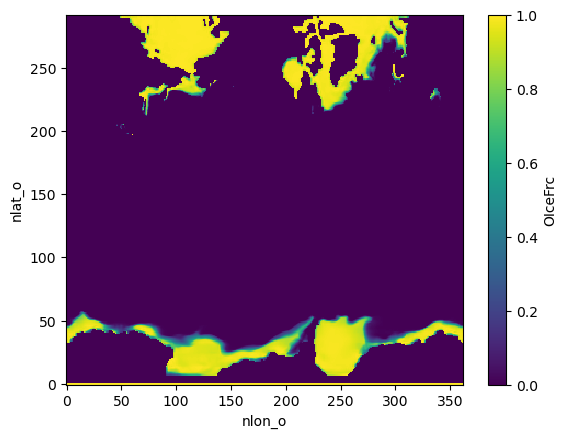

In [ ]:
canesm5_ice.plot()

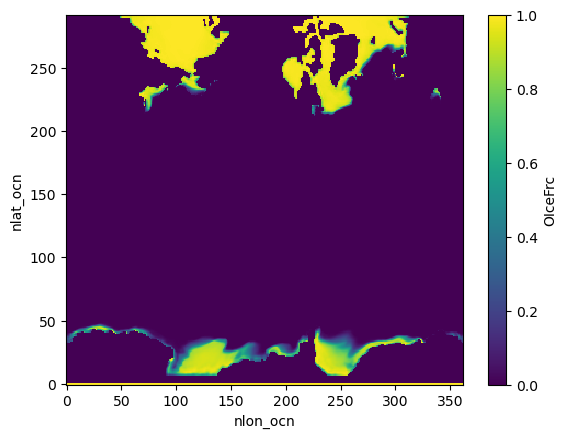

In [ ]:
canesm6_ice.plot()

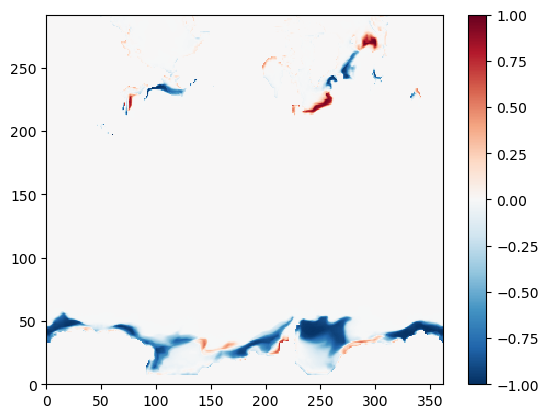

In [ ]:
plt.pcolormesh(canesm6_ice.values - canesm5_ice.values, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()

In [ ]:
ds_cpl_his1
